# Predictive Modeling Example

## Step 1: Import a number of libraries that we expect to use

In [40]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


np.random.seed(1) # set this to ensure the results are repeatable. 

# this is a notebook 'MAGIC' that will allow for creation of inline plots (this is the defaul, so often not necessary)
%matplotlib inline

## Step 2: Load the given data that we will model

In [41]:
df = pd.read_csv('./dec_obv.csv')

df.head(10)

,X,y
0,16.24,281.50640
1,-6.12,41.47160
2,-5.28,-55.61240
3,-10.73,106.98435
4,8.65,117.60875
5,-23.02,734.24060
6,17.45,462.44875
7,-7.61,70.20315
8,3.19,-32.69085
9,-2.49,57.19515


Seperate out the input m(X) and the target (y)

In [42]:
X = df[['X']]
y = df[['y']]

## Step 3: Explore the given data

Explore the data using a scatterplot.

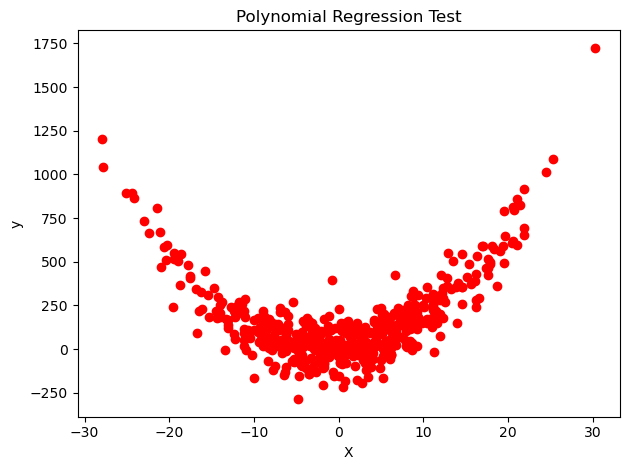

In [43]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

## Step 4: Fit the model

Fit the linear regression model to the dataset

In [44]:
lin_reg1=LinearRegression().fit(X,y)

## Step 5: Analyze the resulting model's performance

Visualize the linear regression model results

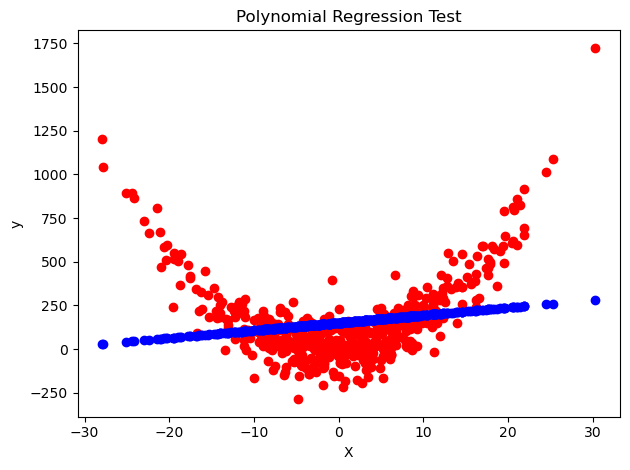

In [45]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg1.predict(X),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

In [46]:
b0 = lin_reg1.intercept_[0]
b1 = lin_reg1.coef_[0][0]
r2 = lin_reg1.score(X, y)

In [47]:
print(f"Y = {b0} + {b1}x")
print(f"R^2: {r2}")

Y = 149.9364680921748 + 4.350111728714826x
R^2: 0.03523733492502412


... using fstring formatting, we can display these values as follows...

In [48]:
print(f"Y = {b0:.2f} + {b1:.2f}x")
print(f"R^2: {r2:.3f}") 
# for more on fstrings see here https://www.freecodecamp.org/news/python-f-strings-tutorial-how-to-use-f-strings-for-string-formatting/

Y = 149.94 + 4.35x
R^2: 0.035


## Step 6: Try another model (in this case, a second order polynomial)

Create the features (that is, x and x^2) for the linear regression. Then do all the analysis we did above again.

In [49]:
X_poly=PolynomialFeatures(degree=2).fit_transform(X)

Fit this model to the polynomial features...

In [50]:
lin_reg2=LinearRegression().fit(X_poly,y)

Explore the results visually...

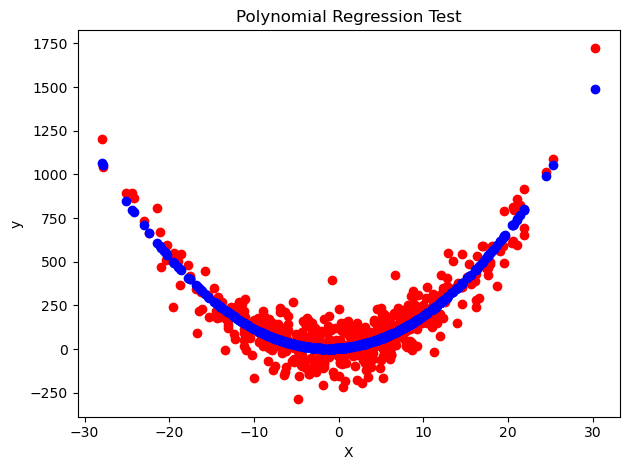

In [51]:
fig = plt.figure()
ax = fig.add_subplot()

ax.scatter(X, y, color='red')
ax.scatter(X,lin_reg2.predict(X_poly),color='blue')

ax.set_xlabel('X')
ax.set_ylabel('y')
ax.set_title("Polynomial Regression Test")
plt.tight_layout()
plt.show()

Look at what the 'hidden model' is that we have identified...

In [52]:
print(f"Y = {lin_reg2.intercept_[0]:.2f} + {lin_reg2.coef_[0][1]:.2f}x + {lin_reg2.coef_[0][2]:.2f}x^2")
print(f"R^2: {lin_reg2.score(X_poly, y):.2f}")

Y = 4.22 + 3.72x + 1.49x^2
R^2: 0.82


# Analysis
#### Here I decreased number observation from N=1000 to N=500 
#### Intercepts value changed from b2 = 1.5, b1 = 3.5, b0 = 1 to Y = 4.22 + 3.72x + 1.49x^2
i.e b2=1.49, b1= 3.72, b0=4.22 
#### and the fit is almost similar and little bit overfit. 
Decreasing the sample size resulting a model might not have sufficient data to analyze
